## Customer Churn - Supervised ML models - Logistic regression, Random forrest and Decision Tree

### IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn import preprocessing
warnings.filterwarnings("ignore")
from pylab import rcParams

### Load CSV

In [3]:
df= pd.read_csv('C:\\Users\\Karthik\\Documents\\Muthperkalai\\CustomerChurn\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Exploring and feature selection

##### General overview of the dataset

In [4]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

the data has 7043 rows and 21 columns

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Our target feature in this problem is Churn. So its important that we know the proportion of churn in our provided dataset to make sure that our training dataset also has the same proportion

In [7]:
Churn_ratio = df['Churn'].value_counts(sort = True)
print(Churn_ratio)

No     5174
Yes    1869
Name: Churn, dtype: int64


lets visualize

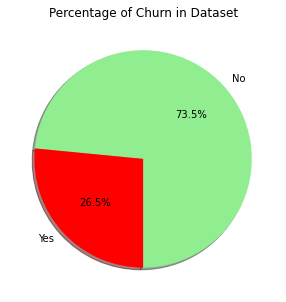

In [8]:
# Data to plot
Churn_ratio = df['Churn'].value_counts(sort = True)
labels = "No", "Yes"
colors = ["lightgreen","red"] 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(Churn_ratio, explode=None, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()


### Data Preparation and Feature Engineering

Better we prepare our data for the machine learning model, the better our prediction will be. If our data is not good then even the results of the most complex ML models as well wont be good

1. Dropping irrelevant data

There may be data included that is not needed to improve our results.  CustomerID is one such field that does not influence our predicted outcome, so we drop this column

In [9]:
df1=df.drop(['customerID'], axis=1)

In [10]:
df1.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


df1 is the dataframe that we are gonna use.

2. Missing values

Its very important that we handle null values. There are various methods to handle null. If your dataset is really huge and enough data is available for training dataset then you can drop the records. Otherwise you can replace them with Mean, Median or Mode, the central tendency value according to your use case

Check for nulls and na s

In [11]:
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df1.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Luckily our data has no null values. But this is a very rare situation. In realtime cases we usually encounter null values and we should handle this 

3. Converting Numerical Features from "Object" dataset

we see that the datatype of Total Charges is object but it is should be of numeric dtype. So we convert them to numeric, and why this is important? It is because our ML models can only work with numeric data

In [13]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'],errors='coerce')

In [14]:
print(pd.to_numeric(df1['TotalCharges'],errors='coerce').isnull().sum())

11


identifying which records was creating error and got replaced with 'NaN'

In [15]:
IS_NULL=df1.isnull()
row_has_NaN = IS_NULL.any(axis=1)
rows_with_NaN = df1[row_has_NaN]
print(rows_with_NaN)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

droping the records that has NaN values. We can replace them with Mean, or Median. But its just 11 out of 7043 avail records. So dropping 11 records and this is not going to affect much.

In [16]:
df1.dropna(subset = ["TotalCharges"], inplace=True)

In [17]:
#Cross checking if the na values are dropped
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df1.shape

(7032, 20)

Now we have 7031 records and 20 columns after dropping customerID column and records that has na s in TotalCharges Column

### 4. Categorical data into numerical data

Models works only with numerical data, so we should convert our categorical data into numerical. We can go with get_dummies() or preprocessing. Here we are gonna try preprocessing

In [19]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [20]:
#creating instance 
gender = preprocessing.LabelEncoder()
#fitting the data
gender.fit(["Female", "Male"])
#transforming the data
df1['gender']=gender.transform(df1['gender'])

In [21]:
Partner=preprocessing.LabelEncoder()
Partner.fit(df1['Partner'])
#transforming the data
df1['Partner']=Partner.transform(df1['Partner'])

In [22]:
Dependents=preprocessing.LabelEncoder()
Dependents.fit(df1['Dependents'])
#transforming the data
df1['Dependents']=Dependents.transform(df1['Dependents'])

In [23]:
DeviceProtection=preprocessing.LabelEncoder()
DeviceProtection.fit(df1['DeviceProtection'])
#transforming the data
df1['DeviceProtection']=DeviceProtection.transform(df1['DeviceProtection'])

In [24]:
PhoneService=preprocessing.LabelEncoder()
PhoneService.fit(df1['PhoneService'])
#transforming the data
df1['PhoneService']=PhoneService.transform(df1['PhoneService'])

In [25]:
MultipleLines=preprocessing.LabelEncoder()
MultipleLines.fit(df1['MultipleLines'])
#transforming the data
df1['MultipleLines']=MultipleLines.transform(df1['MultipleLines'])

In [26]:
InternetService=preprocessing.LabelEncoder()
InternetService.fit(df1['InternetService'])
InternetService.classes_
#transforming the data
df1['InternetService']=InternetService.transform(df1['InternetService'])

In [27]:
OnlineSecurity=preprocessing.LabelEncoder()
OnlineSecurity.fit(df1['OnlineSecurity'])
OnlineSecurity.classes_
#transforming the data
df1['OnlineSecurity']=OnlineSecurity.transform(df1['OnlineSecurity'])

In [31]:
OnlineBackup=preprocessing.LabelEncoder()
OnlineBackup.fit(df1['OnlineBackup'])
#transforming the data
df1['OnlineBackup']=OnlineBackup.transform(df1['OnlineBackup'])

In [32]:
TechSupport=preprocessing.LabelEncoder()
TechSupport.fit(df1['TechSupport'])
#transforming the data
df1['TechSupport']=TechSupport.transform(df1['TechSupport'])

In [33]:
StreamingTV=preprocessing.LabelEncoder()
StreamingTV.fit(df1['StreamingTV'])
#transforming the data
df1['StreamingTV']=StreamingTV.transform(df1['StreamingTV'])

In [34]:
StreamingMovies=preprocessing.LabelEncoder()
StreamingMovies.fit(df1['StreamingMovies'])
#transforming the data
df1['StreamingMovies']=StreamingMovies.transform(df1['StreamingMovies'])

In [35]:
Contract=preprocessing.LabelEncoder()
Contract.fit(df1['Contract'])
Contract.classes_
#transforming the data
df1['Contract']=Contract.transform(df1['Contract'])

In [36]:
PaperlessBilling=preprocessing.LabelEncoder()
PaperlessBilling.fit(df1['PaperlessBilling'])
#transforming the data
df1['PaperlessBilling']=PaperlessBilling.transform(df1['PaperlessBilling'])

In [37]:
PaymentMethod=preprocessing.LabelEncoder()
PaymentMethod.fit(df1['PaymentMethod'])
#transforming the data
df1['PaymentMethod']=PaymentMethod.transform(df1['PaymentMethod'])

In [38]:
Churn=preprocessing.LabelEncoder()
Churn.fit(df1['Churn'])
#transforming the data
df1['Churn']=Churn.transform(df1['Churn'])

In [39]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


all categorical type fields are converted to numerical dtypes. Now the data is good to feed into the model

# Exploratory data analysis

In [40]:
df2=df1[['gender','Churn']]

In [41]:
df2.corr()

,gender,Churn
gender,1.000000,-0.008545
Churn,-0.008545,1.000000


In [42]:
#there is not much of a strength of correlation between Gender and churn.

In [43]:
df1.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


tenure and contract are positively correlated and its because your tenure is obviously more if you have a prolonged contract

tech support and churn is negatively correlated because less the tech support more the customers leave the company and this might be one of the cases why the customers leave

Contract and churn is negatively correlated. 
Tenure and contract is positively correlated. 
Churn rate is high for two year contracts(thus more tenure)

### 5. Splitting the dataset

#### Lets train and test the model for which we need training data and testing data. Lets go ahead and create them

In [44]:
# X = independent variables
# Y = dependent variables
# Ratio = 80:20

In [45]:
x=df1.drop(['Churn'], axis=1)
y=df1['Churn']

In [46]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=101)

# Prediction

# Logistic Regression & Model Testing

Step 1: import the model

Step 2: Create instance

Step 3: Train the model using training data and store the results 

Step 4: predict the test data using model built

Step 5: Measure the accuracy using metrics like R^2

In [50]:
#import the model
from sklearn.linear_model import LogisticRegression
#Create instance
model = LogisticRegression()
#Train the model using training data and store the results 
result = model.fit(X_train, y_train)

In [52]:
#predict the test data using model builtprediction_test = model.predict(X_test)
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8073916133617626


R^2 is 0.80. It's close to 1, thus the model is pretty good

we set the coefficients in our model to zero and look at the weights of each variable inorder to understand which independent variables have the most influence on our predicted outcome

In [53]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
 index=x.columns.values)
weights.sort_values(ascending = False)

PaperlessBilling    0.329652
SeniorCitizen       0.252194
StreamingTV         0.090383
MultipleLines       0.083555
InternetService     0.075046
StreamingMovies     0.073110
MonthlyCharges      0.014625
TotalCharges        0.000343
Partner            -0.021029
gender             -0.029557
DeviceProtection   -0.047174
PaymentMethod      -0.061814
tenure             -0.063016
OnlineBackup       -0.105339
Dependents         -0.201970
TechSupport        -0.342652
OnlineSecurity     -0.355925
PhoneService       -0.399885
Contract           -0.737872
dtype: float64

There is positive and negative values which means the positive value has positive impact on the target variable. In our case, the positive value items increases the chances of the customers to churn

## DecisionTree Classifier 

In [55]:
#import the model
from sklearn.tree import DecisionTreeClassifier
#Create instance
dt_model = DecisionTreeClassifier()
#Train the model using training data and store the results 
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
#predict the test data using model builtprediction_test = model.predict(X_test)
from sklearn import metrics
dt_prediction_test = dt_model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, dt_prediction_test))

0.7263681592039801


R^2 is 0.726. It's close to 1, but still the accuracy is less than logistic regression method. Lets try Random forest method and check accuracy

## Random forest classifier 

In [64]:
#import the model
from sklearn.ensemble import RandomForestClassifier
#Create instance
rf_model = RandomForestClassifier(n_estimators=100)
#Train the model using training data and store the results 
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
.values.ravel()

In [66]:
#predict the test data using model builtprediction_test = model.predict(X_test)
rf_prediction_test = rf_model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, rf_prediction_test))

0.7910447761194029


R^2 is 0.79. It's close to 1, 
and its better than decision tree method and the accuracy of Random forrest and logistic regression method are more or less the same.

As data is impartial, we can review furthur with cross validation and the model can also be improved by understanding the what factors affects the churn a lot.